In [1]:
# pip install tensorflow-gpu

In [2]:
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

In [3]:
# import tensorflow as tf
# # if tf.test.gpu_device_name():
# #     print('Default GPU Device: {}'.format(tf.list_physical_devices('GPU')))
# # else:
# #     print("Please install GPU version of TF")
# print(tf.config.list_physical_devices('GPU'))
# tf.test.is_built_with_cuda()

In [1]:
import numpy as np
import pandas as pd

import re

import matplotlib.pyplot as plt
import seaborn as sns

import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

2022-10-09 23:49:01.523619: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-09 23:49:01.923094: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-09 23:49:01.923174: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-09 23:49:01.969184: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-09 23:49:03.132029: W tensorflow/stream_executor/platform/de

In [2]:
data = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)

In [3]:
data

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [5]:
data1 = data.copy()

In [6]:
def clean_text(text):
    #Lower case each word 
    text = text.lower()
    
    #Removing Punctuations
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"\'ll", "will", text)
    text = re.sub(r"they're", "they are", text)
    text = re.sub(r"we're", "we are", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"\'ve'", "have", text)
    text = re.sub(r"\'re'", "are", text)
    text = re.sub(r"\'d'", "would", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub("didn't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"wouldn't", "would not", text)
    text = re.sub(r"cannot", "can not", text)
    text = re.sub(r"haven't", "have not", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"&", "and", text)
    text = re.sub(r"you'll", "you will", text)
    
    return text

In [7]:

def clean_tokenize(ddf):
    lines = ddf['headline'].values.tolist()
    head_lines = list()
    
    for line in lines:
        line = clean_text(line)
        
        #tokenize the text
        tokens = word_tokenize(line)
        
        #Remove punctuations
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        
        #Remove non alphabetic characters
        words = [word for word in stripped if word.isalpha()]

        #Remoce stop words
        stop_words = set(stopwords.words("english"))
        words = [w for w in words if not w in stop_words]
       
        head_lines.append(words)
    
    return head_lines
head_lines = clean_tokenize(data1)
head_lines[0:5]

[['former',
  'versace',
  'store',
  'clerk',
  'sues',
  'secret',
  'black',
  'code',
  'minority',
  'shoppers'],
 ['roseanne',
  'revival',
  'catches',
  'thorny',
  'political',
  'mood',
  'better',
  'worse'],
 ['mom',
  'starting',
  'fear',
  'son',
  'web',
  'series',
  'closest',
  'thing',
  'grandchild'],
 ['boehner',
  'wants',
  'wife',
  'listen',
  'come',
  'alternative',
  'debtreduction',
  'ideas'],
 ['jk', 'rowling', 'wishes', 'snape', 'happy', 'birthday', 'magical', 'way']]

In [8]:
data2 = data1.copy()

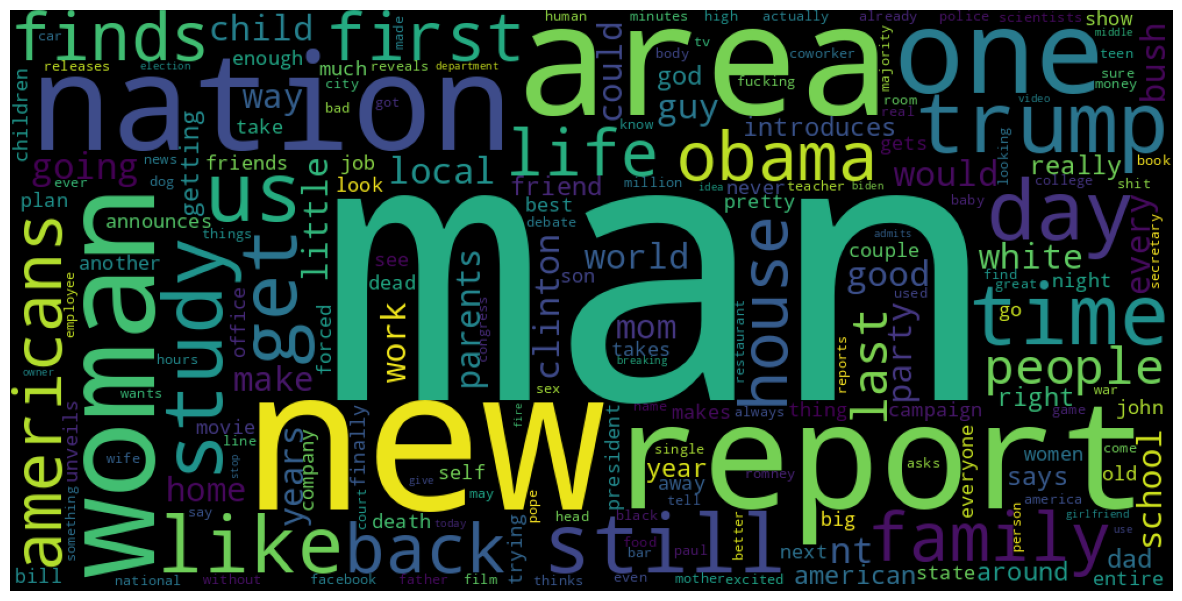

In [33]:
from wordcloud import WordCloud, ImageColorGenerator
pos_data = data2.loc[data2['is_sarcastic'] == 1]
pos_head_lines = clean_tokenize(pos_data)
pos_lines = [i for sub in pos_head_lines for i in sub]

from collections import Counter
word_cloud_dict = Counter(pos_lines)

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_cloud_dict)
plt.figure(figsize=(15,8))
plt.axis("off")
plt.savefig('wordcloud.png', bbox_inches='tight', dpi=150)
plt.imshow(wordcloud)

In [10]:
def get_sequences(texts, tokenizer, train=True, max_seq_length=None):
    sequences = tokenizer.texts_to_sequences(texts)
    
    if train == True:
        max_seq_length = np.max(list(map(len, sequences)))
    
    sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_seq_length, padding='post')
    
    return sequences

In [11]:
def preprocess_inputs(df):
    df = df.copy()
    
    #Drop article link column
    df = df.drop('article_link', axis=1)
    
    #Split df into feature and target
    y = df['is_sarcastic']
    X = df['headline']
    
    #split train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, shuffle=True, random_state=24)
    
    #Creating Tokenizer and fitting on X_train
    tokenizer = tf.keras.preprocessing.text.Tokenizer()

    tokenizer.fit_on_texts(X_train)

    print("Vocabulary length:", len(tokenizer.word_index) + 1)
    
    # Get sequence data
    X_train = get_sequences(texts=X_train, tokenizer=tokenizer, train=True)
    X_test = get_sequences(texts=X_test, tokenizer=tokenizer, train=False, max_seq_length=X_train.shape[1])
    
    print("Sequence length:", X_train.shape[1])
    
    
    return X_train, X_test, y_train, y_test

In [12]:
X_train, X_test, y_train, y_test = preprocess_inputs(data2)

Vocabulary length: 24788
Sequence length: 40


In [13]:
X_train

array([[   13,   802,   321, ...,     0,     0,     0],
       [  484,     2,    61, ...,     0,     0,     0],
       [   18,    11,  2673, ...,     0,     0,     0],
       ...,
       [ 1581, 11406,   219, ...,     0,     0,     0],
       [ 5279,   448,  2428, ...,     0,     0,     0],
       [  160,    91,  2941, ...,     0,     0,     0]], dtype=int32)

In [14]:
inputs = tf.keras.Input(shape=(40,))
x = tf.keras.layers.Embedding(
    input_dim=24789,
    output_dim=64
)(inputs)

# x = tf.keras.layers.LSTM(256, dropout=0.5, recurrent_dropout=0)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40)]              0         
                                                                 
 embedding (Embedding)       (None, 40, 64)            1586496   
                                                                 
 flatten (Flatten)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 256)               655616    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65    

2022-10-09 23:49:11.977849: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-09 23:49:11.978161: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-09 23:49:11.978304: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-10-09 23:49:11.978417: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-10-09 23:49:11.978491: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [15]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

/home/anand_ml/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/100
468/468 [==============================] - 7s 13ms/step - loss: 0.4178 - accuracy: 0.7941 - auc: 0.8851 - val_loss: 0.3191 - val_accuracy: 0.8596 - val_auc: 0.9368
Epoch 2/100
468/468 [==============================] - 6s 13ms/step - loss: 0.0920 - accuracy: 0.9674 - auc: 0.9938 - val_loss: 0.4534 - val_accuracy: 0.8422 - val_auc: 0.9211
Epoch 3/100
468/468 [==============================] - 6s 12ms/step - loss: 0.0110 - accuracy: 0.9967 - auc: 0.9997 - val_loss: 0.6667 - val_accuracy: 0.8428 - val_auc: 0.9046
Epoch 4/100
468/468 [==============================] - 6s 13ms/step - loss: 0.0020 - accuracy: 0.9994 - auc: 0.9999 - val_loss: 0.9528 - val_accuracy: 0.8318 - val_auc: 0.8815


Accuracy: 87.11%
     AUC: 0.94332
251/251 [==============================] - 0s 989us/step


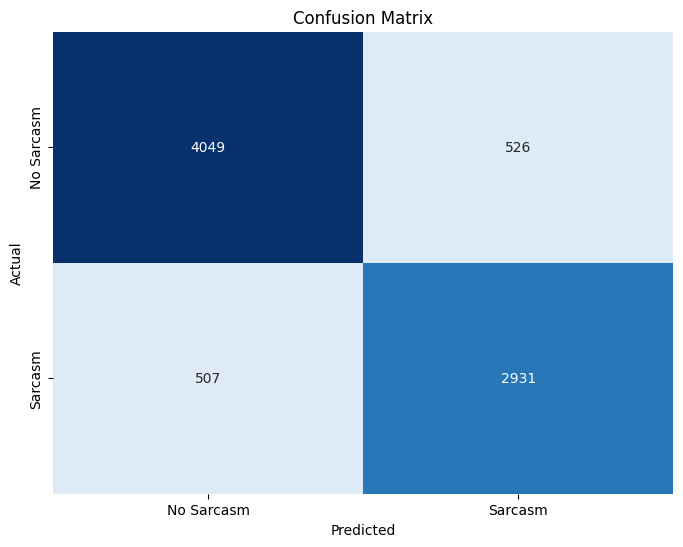

Classification Report:
----------------------
               precision    recall  f1-score   support

  No Sarcasm       0.89      0.89      0.89      4575
     Sarcasm       0.85      0.85      0.85      3438

    accuracy                           0.87      8013
   macro avg       0.87      0.87      0.87      8013
weighted avg       0.87      0.87      0.87      8013



In [34]:
results = model.evaluate(X_test, y_test, verbose=0)

print("Accuracy: {:.2f}%".format(results[1] * 100))
print("     AUC: {:.5f}".format(results[2]))

y_pred = np.squeeze(model.predict(X_test) >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
clr = classification_report(y_test, y_pred, labels=[0, 1], target_names=["No Sarcasm", "Sarcasm"])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0.5, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["No Sarcasm", "Sarcasm"])
plt.yticks(ticks=[0.5, 1.5], labels=["No Sarcasm", "Sarcasm"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('sarcasm-cmx.png', bbox_inches='tight', dpi=120)
plt.show()

print("Classification Report:\n----------------------\n", clr)